# Gradient Boosting

In [61]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as MSE
import matplotlib.pyplot as plt




In [4]:
df = pd.read_csv("CHURNF.csv")
df.head(5)

,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,churnf
0,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,0
1,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,0
2,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,0
3,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,0
4,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,0


In [6]:
y = df[["churnf"]]
X = df[["total day minutes", "total day calls","total eve minutes","total eve calls","total day charge","total eve charge","total night minutes","total night calls","total night charge","total intl minutes"]]

In [7]:
# Create the training and test sets
X_train,X_test,y_train,y_test= train_test_split(X, y, test_size=0.2, random_state=123)

In [9]:
# Instantiate the XGBClassifier: xg_cl
xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=123)


In [10]:
# Fit the classifier to the training set
xg_cl.fit(X_train,y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=123, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=123, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [11]:
# Predict the labels of the test set: preds
preds = xg_cl.predict(X_test)


In [14]:
# Evaluate and print test-set accuracy
accuracy = accuracy_score(y_test, preds)
print('Accuracy of Baggign Classifier: {:.3f}'.format(accuracy))

Accuracy of Baggign Classifier: 0.874


# Cross Validation with DTMatrix

In [15]:
# Create the DMatrix from X and y: churn_dmatrix
churn_dmatrix = xgb.DMatrix(data=X, label=y)


In [16]:
# Create the parameter dictionary: params
params = {"objective":"reg:logistic", "max_depth":3}


In [17]:
# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=churn_dmatrix, params=params, 
                    nfold=3, num_boost_round=5, 
                    metrics="error", as_pandas=True, seed=123)


In [18]:
# Print cv_results
print(cv_results)


   train-error-mean  train-error-std  test-error-mean  test-error-std
0          0.118512         0.003414         0.128713        0.006736
1          0.115512         0.003681         0.127213        0.003625
2          0.112811         0.003125         0.125112        0.006364
3          0.112511         0.005052         0.125712        0.004667
4          0.111011         0.004064         0.124513        0.008358


In [19]:
# Print the accuracy
print(((1-cv_results["test-error-mean"]).iloc[-1]))

0.8754873333333333


In [20]:
# Perform cross_validation: cv_results
cv_results = xgb.cv(dtrain=churn_dmatrix, params=params, 
                    nfold=3, num_boost_round=5, 
                    metrics="auc", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Print the AUC
print((cv_results["test-auc-mean"]).iloc[-1])

   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.713821       0.021153       0.684742      0.005078
1        0.737288       0.016528       0.710326      0.008923
2        0.750878       0.010821       0.711638      0.017402
3        0.760891       0.008871       0.719560      0.015057
4        0.772847       0.007623       0.731231      0.008579
0.7312313333333332


# Regression Trees

In [35]:
df2 = pd.read_csv("ameshousingpricespreprocessed.csv")
df2.head(5)
#list(df2.columns)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,Remodeled,GrLivArea,BsmtFullBath,BsmtHalfBath,...,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,PavedDrive_P,PavedDrive_Y,SalePrice
0,60,65,8450,7,5,2003,0,1710,1,0,...,0,0,0,0,1,0,0,0,1,208500
1,20,80,9600,6,8,1976,0,1262,0,1,...,0,1,0,0,0,0,0,0,1,181500
2,60,68,11250,7,5,2001,1,1786,1,0,...,0,0,0,0,1,0,0,0,1,223500
3,70,60,9550,7,5,1915,1,1717,1,0,...,0,0,0,0,1,0,0,0,1,140000
4,60,84,14260,8,5,2000,0,2198,1,0,...,0,0,0,0,1,0,0,0,1,250000


In [37]:
y = df2[["SalePrice"]]
X = df2[["MSSubClass",
 "LotFrontage",
 "LotArea",
 "OverallQual",
 "OverallCond",
 "YearBuilt",
 "Remodeled",
 "GrLivArea",
 "BsmtFullBath",
 "BsmtHalfBath",
 "FullBath",
 "HalfBath",
 "BedroomAbvGr",
 "Fireplaces",
 "GarageArea",
 "MSZoning_FV",
 "MSZoning_RH",
 "MSZoning_RL",
 "MSZoning_RM",
 "Neighborhood_Blueste",
 "Neighborhood_BrDale",
 "Neighborhood_BrkSide",
 "Neighborhood_ClearCr",
 "Neighborhood_CollgCr",
 "Neighborhood_Crawfor",
 "Neighborhood_Edwards",
 "Neighborhood_Gilbert",
 "Neighborhood_IDOTRR",
 "Neighborhood_MeadowV",
 "Neighborhood_Mitchel",
 "Neighborhood_NAmes",
 "Neighborhood_NPkVill",
 "Neighborhood_NWAmes",
 "Neighborhood_NoRidge",
 "Neighborhood_NridgHt",
 "Neighborhood_OldTown",
 "Neighborhood_SWISU",
 "Neighborhood_Sawyer",
 "Neighborhood_SawyerW",
 "Neighborhood_Somerst",
 "Neighborhood_StoneBr",
 "Neighborhood_Timber",
 "Neighborhood_Veenker",
 "BldgType_2fmCon",
 "BldgType_Duplex",
 "BldgType_Twnhs",
 "BldgType_TwnhsE",
 "HouseStyle_1.5Unf",
 "HouseStyle_1Story",
 "HouseStyle_2.5Fin",
 "HouseStyle_2.5Unf",
 "HouseStyle_2Story",
 "HouseStyle_SFoyer",
 "HouseStyle_SLvl",
 "PavedDrive_P",
 "PavedDrive_Y"]]

In [41]:
# Create the training and test sets
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=123)


In [42]:
# Instantiate the XGBRegressor: xg_reg
xg_reg = xgb.XGBRegressor(objective="reg:linear", n_estimators=10, seed=123)


In [43]:
# Fit the regressor to the training set
xg_reg.fit(X_train, y_train)


[12:50:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[12:50:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10, n_jobs=0, num_parallel_tree=1,
             objective='reg:linear', random_state=123, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=123, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [44]:
# Predict the labels of the test set: preds
preds = xg_reg.predict(X_test)



In [46]:
# Evaluate the test set RMSE
rmse_test = MSE(y_test, preds)**(1/2)

# print the test rmse
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 28106.46


In [47]:
# Convert the training and testing sets into DMatrixes: DM_train, DM_test
DM_train = xgb.DMatrix(data=X_train, label=y_train)
DM_test =  xgb.DMatrix(data=X_test, label=y_test)

# Create the parameter dictionary: params
params = {"booster":"gblinear", "objective":"reg:linear"}

# Train the model: xg_reg
xg_reg = xgb.train(params = params, dtrain=DM_train, num_boost_round=5)

[12:51:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[12:51:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [48]:
# Predict the labels of the test set: preds
preds = xg_reg.predict(DM_test)

In [49]:
# Evaluate the test set RMSE
rmse_test = MSE(y_test, preds)**(1/2)

# print the test rmse
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 44495.71


In [51]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X,label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:linear", "max_depth":4}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=4, num_boost_round=5, metrics="rmse", as_pandas=True, seed=123)


[12:53:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[12:53:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[12:53:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[12:53:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [52]:
# Print cv_results
print(cv_results)

# Extract and print final round boosting round metric
print((cv_results["test-rmse-mean"]).tail(1))

   train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0    141767.531250      429.448328   142980.433594    1193.789595
1    102832.542969      322.468976   104891.392578    1223.157953
2     75872.617188      266.473250    79478.937500    1601.344539
3     57245.650391      273.625908    62411.924805    2220.148314
4     44401.295899      316.422824    51348.281250    2963.379118
4    51348.28125
Name: test-rmse-mean, dtype: float64


In [53]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X,label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:linear", "max_depth":4}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=4, num_boost_round=5, metrics="mae", as_pandas=True, seed=123)


[12:53:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[12:53:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[12:53:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[12:53:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [54]:
# Print cv_results
print(cv_results)

# Extract and print final round boosting round metric
print((cv_results["test-mae-mean"]).tail(1))

   train-mae-mean  train-mae-std  test-mae-mean  test-mae-std
0   127343.572266     668.344199  127633.988282   2403.993968
1    89770.056641     456.949630   90122.498047   2107.907095
2    63580.791016     263.405561   64278.559571   1887.564512
3    45633.141602     151.886070   46819.167969   1459.813514
4    33587.092774      86.999470   35670.649414   1140.607637
4    35670.649414
Name: test-mae-mean, dtype: float64


# REGULARIZATION

In [55]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

reg_params = [1, 10, 100]

# Create the initial parameter dictionary for varying l2 strength: params
params = {"objective":"reg:linear","max_depth":3}

# Create an empty list for storing rmses as a function of l2 complexity
rmses_l2 = []

# Iterate over reg_params
for reg in reg_params:

    # Update l2 strength
    params["lambda"] = reg
    
    # Pass this updated param dictionary into cv
    cv_results_rmse = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=2, num_boost_round=5, metrics="rmse", as_pandas=True, seed=123)
    
    # Append best rmse (final round) to rmses_l2
    rmses_l2.append(cv_results_rmse["test-rmse-mean"].tail(1).values[0])


[12:54:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[12:54:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[12:54:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[12:54:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[12:54:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[12:54:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:17

In [56]:
# Look at best rmse per l2 param
print("Best rmse as a function of l2:")
print(pd.DataFrame(list(zip(reg_params, rmses_l2)), columns=["l2","rmse"]))

Best rmse as a function of l2:
    l2          rmse
0    1  52275.355469
1   10  57746.066406
2  100  76624.628907


In [62]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:linear", "max_depth":2}

# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round=10)


[12:58:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[12:58:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
# Plot the first tree
xgb.plot_tree(xg_reg, num_trees=0)
plt.show()

# Plot the fifth tree
xgb.plot_tree(xg_reg, num_trees=4)
plt.show()

# Plot the last tree sideways
xgb.plot_tree(xg_reg, num_trees=9, rankdir='LR')
plt.show()

[13:00:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[13:00:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


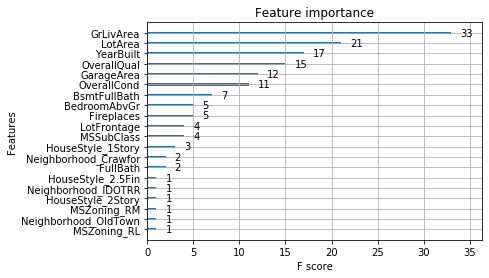

In [64]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:linear", "max_depth":4}

# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round=10)

# Plot the feature importances
xgb.plot_importance(xg_reg)
plt.show()